In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [2]:
valid_dataset = pd.read_csv("Dataset/preprocessed_datasetDec-10-2020.csv")

In [3]:
valid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1301 non-null   float64
 1   kurtosis_oxygen   1301 non-null   float64
 2   std_oxygen        1301 non-null   float64
 3   skewness_oxygen   1301 non-null   float64
 4   fnlwgt            1301 non-null   float64
 5   class             1301 non-null   float64
 6   mean_oxygen       1301 non-null   float64
 7   hours-per-week    1301 non-null   float64
 8   mean_glucose      1301 non-null   float64
 9   std_glucose       1301 non-null   float64
 10  kurtosis_glucose  1301 non-null   float64
 11  skewness_glucose  1301 non-null   float64
 12  pregnant          1301 non-null   float64
 13  sex_ Female       1301 non-null   float64
 14  sex_ Male         1301 non-null   float64
dtypes: float64(15)
memory usage: 152.6 KB


In [4]:
X = valid_dataset.drop("class", axis=1)
y = valid_dataset["class"]
# X = SelectKBest(score_func=mutual_info_regression, k=10).fit_transform(X, y)

In [6]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X, y)
X = X.filter(sfs.k_feature_names_)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_oxygen       1301 non-null   float64
 1   std_glucose       1301 non-null   float64
 2   kurtosis_glucose  1301 non-null   float64
 3   skewness_glucose  1301 non-null   float64
dtypes: float64(4)
memory usage: 40.8 KB


In [7]:
def simple_tree(data, test, classifier, max_iter):
    lower_bound = np.percentile(data[classifier], 25)
    step = abs(data[classifier].mean()/100)
    best_results = []
    acc = 0
    for i in range(max_iter):   
        results = []
        splitter = lower_bound + step
        for value in data[classifier]:
            if value <= splitter:
                results.append(0)
            else:
                results.append(1)
        new_acc = metrics.accuracy_score(test, results)
        if new_acc > acc:
            acc = new_acc
            best_results = results[:]
        lower_bound = lower_bound + step
    
    return best_results


In [8]:
import random
def three_tree(data, test, primary, secondary, ternary, max_iter):
    primary_weight = 0.8
    secondary_weight = 0.6
    ternary_weight = 0.4
    best_results = []
    acc = 0
    for j in range(max_iter):
        weights = [0 for x in data[primary]]

        splitter = data[primary].mean() + (j/100)
        i = 0
        for value in data[primary]:
            if value <= splitter:
                weights[i] = weights[i] - primary_weight
            else:
                weights[i] = weights[i] + primary_weight
            i = i + 1

        splitter = data[secondary].mean() + (j/100)
        i = 0
        for value in data[secondary]:
            if value <= splitter:
                weights[i] = weights[i] - secondary_weight
            else:
                weights[i] = weights[i] + secondary_weight
            i = i + 1

        splitter = data[ternary].mean() + (j/100)
        i = 0
        for value in data[ternary]:
            if value <= splitter:
                weights[i] = weights[i] - ternary_weight
            else:
                weights[i] = weights[i] + ternary_weight
            i = i + 1

        results = []
        for value in weights:
            if value <= 0:
                results.append(0)
            else:
                results.append(1)

        new_acc = metrics.accuracy_score(test, results)
        if new_acc > acc:
            acc = new_acc
            best_results = results[:]
        primary_weight = random.randrange(6000, 9000) / 10000
        secondary_weight = random.randrange(4000, 6000) / 10000
        ternary_weight = random.randrange(2000, 4000) / 10000
    return best_results

Simple tree Accuracy: 0.9465116279069767
simple tree:
                 Predicted Negative  Predicted Positive
Actual Negative                 324                   1
Actual Positive                  22                  83 

Tripple tree Accuracy: 0.9604651162790697
tripple tree:
                 Predicted Negative  Predicted Positive
Actual Negative                 315                  10
Actual Positive                   7                  98 

True Positives: 83 False Positives: 1 True Negatives: 324 False Negatives: 22 

Logistic regression Accuracy: 0.9720930232558139
Logistic regresion:
                 Predicted Negative  Predicted Positive
Actual Negative                 321                   4
Actual Positive                   8                  97 

True Positives: 97 False Positives: 4 True Negatives: 321 False Negatives: 8 

FPR [0.         0.         0.         0.00307692 0.00307692 0.00615385
 0.00615385 0.00923077 0.00923077 0.01230769 0.01230769 0.01538462
 0.01538462 0.

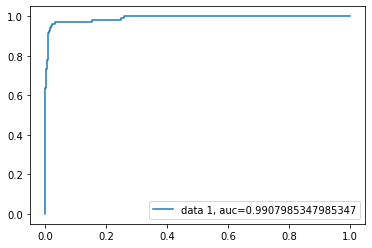

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)
clf = LogisticRegression(penalty='l2', 
                         C=0.1, 
                         max_iter=5000)
clf.fit(X_train, y_train)

y_simple_pred = simple_tree(X_test, y_test, "skewness_glucose", 5000)
print('Simple tree Accuracy:', metrics.accuracy_score(y_test, y_simple_pred))

cm_simple = metrics.confusion_matrix(y_test, y_simple_pred)
print("simple tree:")
print(pd.DataFrame(cm_simple, 
                   columns=['Predicted Negative', 'Predicted Positive'], 
                   index=['Actual Negative', 'Actual Positive']), '\n')


y_tripple_pred = three_tree(X_test, y_test, "skewness_glucose", "kurtosis_glucose", "std_glucose", 5000)
print('Tripple tree Accuracy:', metrics.accuracy_score(y_test, y_tripple_pred))

cm_tripple = metrics.confusion_matrix(y_test, y_tripple_pred)
print("tripple tree:")
print(pd.DataFrame(cm_tripple, 
                   columns=['Predicted Negative', 'Predicted Positive'], 
                   index=['Actual Negative', 'Actual Positive']), '\n')

y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm_simple.ravel()
print(f'True Positives: {tp}', 
      f'False Positives: {fp}', 
      f'True Negatives: {tn}',
      f'False Negatives: {fn}', '\n')


print('Logistic regression Accuracy:', metrics.accuracy_score(y_test, y_pred))
print("Logistic regresion:")
print(pd.DataFrame(cm, 
                   columns=['Predicted Negative', 'Predicted Positive'], 
                   index=['Actual Negative', 'Actual Positive']), '\n')
tn, fp, fn, tp = cm.ravel()
print(f'True Positives: {tp}', 
      f'False Positives: {fp}', 
      f'True Negatives: {tn}',
      f'False Negatives: {fn}', '\n')


y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('FPR', fpr, 
      '\nTPR', tpr, 
      '\nthreshold', 
      '\nthreshold',  
      '\nROC-AUC', auc)

plt.plot(fpr, tpr, label="data 1, auc="+str(auc) )
plt.legend(loc=4)
plt.show()

In [10]:
cls = DecisionTreeClassifier(criterion='entropy')
cls.fit(X, y)
# display(SVG(graph.pipe(format='svg')))

DecisionTreeClassifier(criterion='entropy')

In [11]:
results = []
estimators = []
for i in range(1, X_train.shape[1] + 1):  
    row = {'model_complexity': i}
    
    # Vytvoríme rozhodovací strom
    # strom s maximalnou hlbkou 1-pocet atributov,  simulujeme tak zlozitost modelu
    clf = DecisionTreeClassifier(max_depth = i) 
    
    # natrenovanie modelu a predikovanie na trenovacej sade
    pred = clf.fit(X_train, y_train).predict(X_train) 
    
    # chyba na trenovacej sade
    row['train'] = 1-accuracy_score(y_train, pred) 
    
    # predickcia
    pred = clf.predict(X_test)
    
    # chyba na testovacej sade
    row['test'] = 1-accuracy_score(y_test, pred) 
    results.append(row)
    estimators.append(clf)

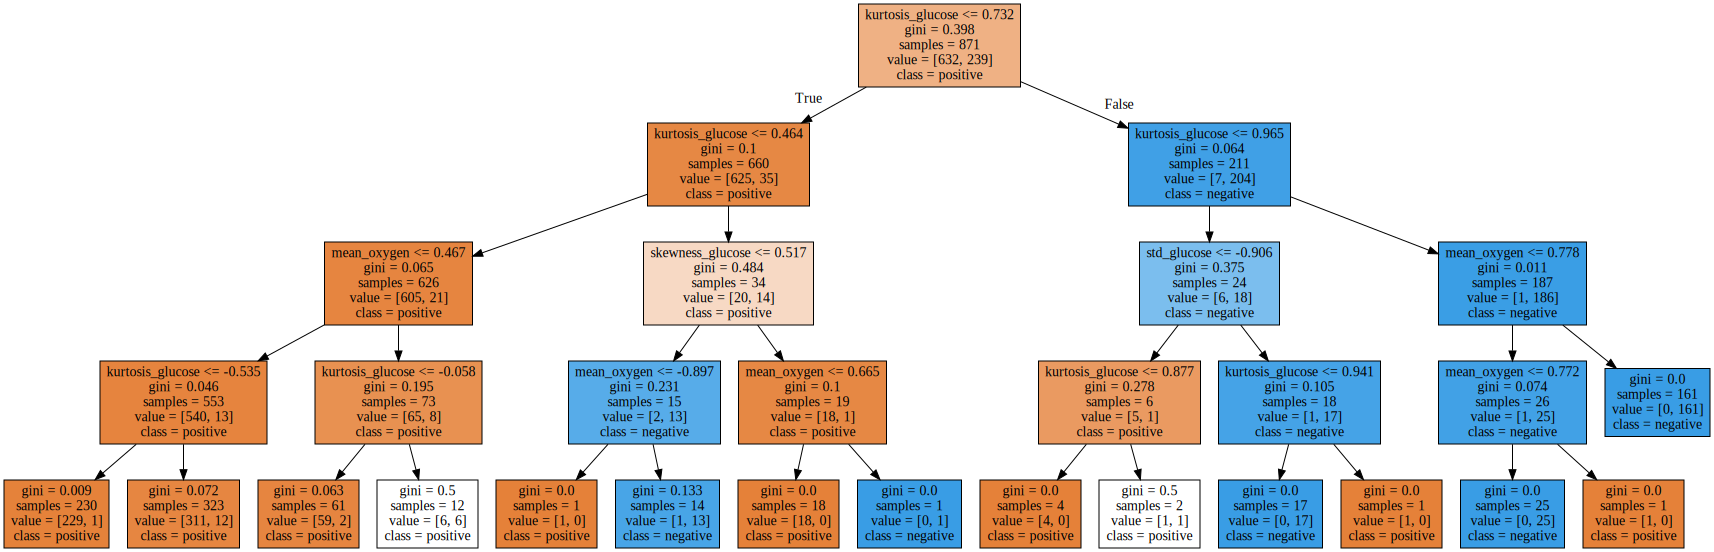

In [56]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(estimators[-1], # najzlozitejsi model
                               out_file=None,
                               feature_names=X.columns,
                               class_names=["positive", "negative"],
                               filled = True))
display(SVG(graph.pipe(format='svg')))

from IPython.display import HTML # toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [14]:
complexity_df = pd.DataFrame(results)
complexity_df.head(15)

,model_complexity,train,test
0,1,0.048220,0.039535
1,2,0.048220,0.039535
2,3,0.030999,0.039535
3,4,0.026406,0.034884


<AxesSubplot:xlabel='model_complexity'>

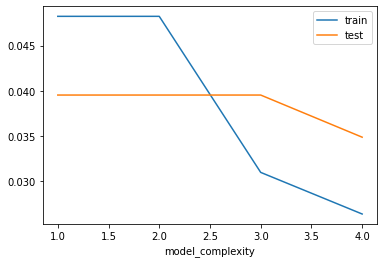

In [15]:
complexity_df.plot(x='model_complexity')

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("accuracy:", accuracy_score(y_test, pred))
print("precision:", precision_score(y_test, pred, average='micro'))
print("recall:", recall_score(y_test, pred, average='macro'))

print(classification_report(y_test, pred))

accuracy: 0.9651162790697675
precision: 0.9651162790697675
recall: 0.9511355311355312
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       325
         1.0       0.93      0.92      0.93       105

    accuracy                           0.97       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.97      0.97      0.97       430



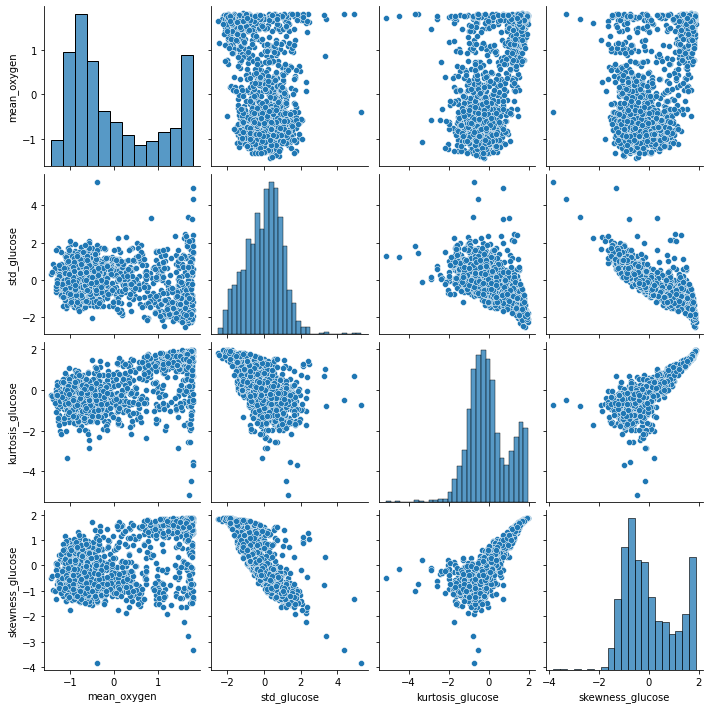

In [17]:
import seaborn as sns
sns.pairplot(X)

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, max_features=3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(n_estimators=100, random_state=10),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=10)
]

bestAcuracyClassifier = [None,0]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)

    falseP = 0
    falseN = 0
    for i in range(len(pred)):
        if pred[i] != y_test.tolist()[i]:
            if pred[i] == 1:
                falseP += 1
            else: 
                falseN += 1

    if  accuracy_score(y_test, pred) > bestAcuracyClassifier[1]:
        bestAcuracyClassifier[0]= classifier
        bestAcuracyClassifier[1] = accuracy_score(y_test, pred)

    print(classifier)
    print()
    print("accuracy:", accuracy_score(y_test, pred))
    print("precision:", precision_score(y_test, pred, average='micro'))
    print("recall:", recall_score(y_test, pred, average='macro'))
    print()
    print(classification_report(y_test, pred))
    print()
    print("False Positive: {}".format(falseP))
    print("False Negative: {}".format(falseN))
    print('-----------------------------------------------------------------------------------------')
print(bestAcuracyClassifier)

DecisionTreeClassifier()

accuracy: 0.9488372093023256
precision: 0.9488372093023256
recall: 0.9435897435897436

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       325
         1.0       0.87      0.93      0.90       105

    accuracy                           0.95       430
   macro avg       0.92      0.94      0.93       430
weighted avg       0.95      0.95      0.95       430


False Positive: 15
False Negative: 7
-----------------------------------------------------------------------------------------
RandomForestClassifier(max_features=3)

accuracy: 0.9697674418604652
precision: 0.9697674418604652
recall: 0.9638827838827839

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       325
         1.0       0.93      0.95      0.94       105

    accuracy                           0.97       430
   macro avg       0.96      0.96      0.96       430
weighted avg       0.97      0.97

In [175]:
randomForestBase=RandomForestClassifier()

In [176]:
rf = RandomForestClassifier()

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [177]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [178]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 10, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 14.9min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [179]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [180]:
randomForestRandomized=RandomForestClassifier(n_estimators= 400,min_samples_split= 5,min_samples_leaf= 1,max_features= "sqrt",max_depth= 30,bootstrap= True)

In [181]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2, return_train_score=True)

In [182]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 15.1min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             return_train_score=True, verbose=2)

In [183]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [188]:
randomForestGrid=RandomForestClassifier(bootstrap=True, max_depth= 80,max_features= 2,min_samples_leaf= 3,min_samples_split= 8,n_estimators= 100)

In [189]:
randomForestGrid.fit(X_train, y_train)
pred=randomForestGrid.predict(X_test)
print("accuracy:", accuracy_score(y_test, pred))
print("precision:", precision_score(y_test, pred, average='micro'))
print("recall:", recall_score(y_test, pred, average='macro'))

accuracy: 0.9720930232558139
precision: 0.9720930232558139
recall: 0.9654212454212454


In [190]:
randomForestRandomized.fit(X_train, y_train)
pred=randomForestRandomized.predict(X_test)
print("accuracy:", accuracy_score(y_test, pred))
print("precision:", precision_score(y_test, pred, average='micro'))
print("recall:", recall_score(y_test, pred, average='macro'))

accuracy: 0.9720930232558139
precision: 0.9720930232558139
recall: 0.9654212454212454


In [191]:
randomForestBase.fit(X_train, y_train)
pred=randomForestBase.predict(X_test)
print("accuracy:", accuracy_score(y_test, pred))
print("precision:", precision_score(y_test, pred, average='micro'))
print("recall:", recall_score(y_test, pred, average='macro'))

accuracy: 0.9674418604651163
precision: 0.9674418604651163
recall: 0.9623443223443223
